In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sonar.csv")
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,0.2988,0.4250,0.6343,0.8198,1.0000,0.9988,0.9508,0.9025,0.7234,0.5122,0.2074,0.3985,0.5890,0.2872,0.2043,0.5782,0.5389,0.3750,0.3411,0.5067,0.5580,0.4778,0.3299,0.2198,0.1407,0.2856,0.3807,0.4158,0.4054,0.3296,0.2707,0.2650,0.0723,0.1238,0.1192,0.1089,0.0623,0.0494,0.0264,0.0081,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
print(f"dataset shape : {data.shape}")

dataset shape : (207, 61)


In [4]:
def ret_count(data):
    ### solve here
    value, count = np.unique(data.iloc[:, -1], return_counts = True)
    for count, value in zip(count, value):
        print(f"{value} : {count}")

In [5]:
data["R"] = data["R"].replace({"R" : 1, "M" : -1})

/tmp/ipykernel_151085/2440122157.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["R"] = data["R"].replace({"R" : 1, "M" : -1})


In [6]:
ret_count(data)

-1 : 111
1 : 96


In [7]:
data.tail()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,-1
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,-1
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,-1
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.9979,0.8297,0.7032,0.7141,0.6893,0.4961,0.2584,0.0969,0.0776,0.0364,0.1572,0.1823,0.1349,0.0849,0.0492,0.1367,0.1552,0.1548,0.1319,0.0985,0.1258,0.0954,0.0489,0.0241,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,-1
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,0.2720,0.2442,0.1665,0.0336,0.1302,0.1708,0.2177,0.3175,0.3714,0.4552,0.5700,0.7397,0.8062,0.8837,0.9432,1.0000,0.9375,0.7603,0.7123,0.8358,0.7622,0.4567,0.1715,0.1549,0.1641,0.1869,0.2655,0.1713,0.0959,0.0768,0.0847,0.2076,0.2505,0.1862,0.1439,0.1470,0.0991,0.0041,0.0154,0.0116,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,-1


In [8]:
y = data["R"]
X = data.drop(["R"], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
X_train = X_train.reset_index(drop = True)
#X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
#y_test = y_test.reset_index(drop = True)
           
print(f"y_train shape : {y_train.shape}, y_test shape : {y_test.shape}")

y_train shape : (175,), y_test shape : (32,)


In [10]:
lc1 = y_train[y_train[:] == 1].index
lc2 = y_train[y_train[:] == -1].index

In [11]:
from sklearn.neighbors import KernelDensity


kde1 = KernelDensity(kernel = "gaussian", bandwidth = "silverman").fit(X_train.iloc[lc1, :])
kde2 = KernelDensity(kernel = "gaussian", bandwidth = "silverman").fit(X_train.iloc[lc2, :])
log_pdf1 = kde1.score_samples(X_test)  # log(PDF) for Class 1
log_pdf2 = kde2.score_samples(X_test)  # log(PDF) for Class 2

pdf1 = np.exp(log_pdf1) # PDF Class 1
pdf2 = np.exp(log_pdf2) # PDF Class 2

# Normalize to get posterior probabilities
total_pdf = pdf1 + pdf2
p_c1_given_x = pdf1 / total_pdf
p_c2_given_x = pdf2 / total_pdf


# Print results
print(f"PDF for Class 1 at x=4: {pdf1}")
print(f"PDF for Class 2 at x=4: {pdf2}")
print(f"Posterior probability of Class 1 at x=4: {p_c1_given_x}")
print(f"Posterior probability of Class 2 at x=4: {p_c2_given_x}")

PDF for Class 1 at x=4: [2.08157287e-22 1.56291978e-22 1.94542945e-22 1.17451371e-22
 1.51749288e-22 6.88039041e-23 1.41931590e-22 1.68995448e-22
 2.25541681e-22 2.00718366e-22 1.29751400e-22 1.21160273e-22
 2.37895975e-22 1.81247924e-22 1.41913030e-22 1.37628268e-22
 1.09751060e-22 9.93297305e-23 2.79197093e-22 1.94845825e-22
 1.27535074e-22 2.37645469e-22 1.87982290e-22 1.25440073e-22
 1.65983107e-22 1.90241006e-22 2.22898621e-22 1.71734818e-22
 1.96181023e-22 1.77429978e-22 1.62421788e-22 1.45430821e-22]
PDF for Class 2 at x=4: [2.46046617e-22 2.23968555e-22 3.22133259e-22 1.36185086e-22
 2.08988840e-22 5.65730286e-23 1.67406505e-22 2.53526609e-22
 2.12379624e-22 2.07229800e-22 1.40072094e-22 1.63142750e-22
 3.13042743e-22 1.74040012e-22 1.95962861e-22 1.21874728e-22
 2.18839820e-22 1.26596309e-22 3.50981675e-22 1.75853137e-22
 1.69435142e-22 2.20176414e-22 2.18471718e-22 1.99490542e-22
 2.97603304e-22 2.79526239e-22 2.92801400e-22 1.86056264e-22
 3.19974409e-22 1.46870363e-22 1.905

In [31]:
p_c1_given_x.shape

(32,)

In [13]:
y_pred = []

for i in range(p_c1_given_x.shape[0]):
    if (p_c1_given_x[i] / p_c2_given_x[i]) > 1:
        y_pred.append(1)
    else:
        y_pred.append(-1)

In [14]:
np.unique(y_pred, return_counts = True)

(array([-1,  1]), array([25,  7]))

In [15]:
np.unique(y_test, return_counts = True)

(array([-1,  1]), array([15, 17]))

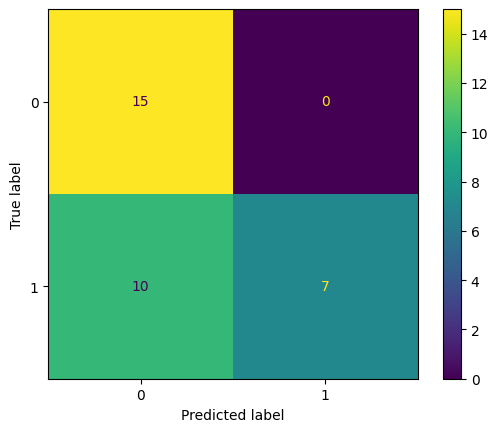

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()

In [51]:
from sklearn.metrics import accuracy_score

def GS_CV(data: pd.DataFrame, att: list, cv: int):
    sample = data.shape[0] // cv
    lst_mean = []
    lst_std = []
    lst_att = []

    perm = np.random.permutation(data.shape[0])
    y = data.iloc[perm, -1]
    X = data.iloc[perm, :-1]

    for bandwidth in att:
        arr_acc = []
        fold_indices = np.array_split(np.arange(X.shape[0]), cv)
        
        for fold in range(cv):
            test_idx = fold_indices[fold]
            train_idx = np.setdiff1d(np.arange(X.shape[0]), test_idx)
            
            X_test = X.iloc[test_idx]
            y_test = y.iloc[test_idx]
            X_train = X.iloc[train_idx]
            y_train = y.iloc[train_idx]
            
            lc1 = y_train[y_train == 1].index
            lc2 = y_train[y_train == -1].index
            
            X_lc1 = X_train.loc[lc1]
            X_lc2 = X_train.loc[lc2]
            
            if X_lc1.shape[0] > 0 and X_lc2.shape[0] > 0:
                kde1 = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X_lc1)
                kde2 = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X_lc2)
                
                log_pdf1 = kde1.score_samples(X_test)
                log_pdf2 = kde2.score_samples(X_test)
                
                pdf1 = np.exp(log_pdf1)
                pdf2 = np.exp(log_pdf2)
                
                p_c1_given_x = [1 if p1 > p2 else -1 for p1, p2 in zip(pdf1, pdf2)]
                
                acc = accuracy_score(y_test, p_c1_given_x)
                arr_acc.append(acc)

        lst_mean.append(np.mean(arr_acc))
        lst_std.append(np.std(arr_acc))
        lst_att.append(bandwidth)
        
    return lst_mean, lst_std, lst_att, pdf1, pdf2


# Sample Data
np.random.seed(42)
data = pd.DataFrame(np.random.rand(100, 5))
data.iloc[:, -1] = np.random.choice([-1, 1], size=100)

# Define bandwidths to search
att = [0.1, 0.5, 1.0]
seq = np.arange(0.1, 2, 0.01)
att.extend(seq)

# Call the function
lst_mean, lst_std, lst_att, p1, p2 = GS_CV(data = data, att = att, cv = 5)

for i in zip(lst_mean, lst_std, lst_att):
    print(f"Using bandwidth {round(i[2], 2)}, we have mean accuracy {round(i[0], 3)} and std {round(i[1], 3)}")


Using bandwidth 0.1, we have mean accuracy 0.4 and std 0.11
Using bandwidth 0.5, we have mean accuracy 0.52 and std 0.103
Using bandwidth 1.0, we have mean accuracy 0.47 and std 0.121
Using bandwidth 0.1, we have mean accuracy 0.4 and std 0.11
Using bandwidth 0.11, we have mean accuracy 0.4 and std 0.11
Using bandwidth 0.12, we have mean accuracy 0.41 and std 0.124
Using bandwidth 0.13, we have mean accuracy 0.41 and std 0.128
Using bandwidth 0.14, we have mean accuracy 0.41 and std 0.128
Using bandwidth 0.15, we have mean accuracy 0.4 and std 0.13
Using bandwidth 0.16, we have mean accuracy 0.41 and std 0.12
Using bandwidth 0.17, we have mean accuracy 0.42 and std 0.112
Using bandwidth 0.18, we have mean accuracy 0.44 and std 0.097
Using bandwidth 0.19, we have mean accuracy 0.43 and std 0.087
Using bandwidth 0.2, we have mean accuracy 0.46 and std 0.073
Using bandwidth 0.21, we have mean accuracy 0.47 and std 0.075
Using bandwidth 0.22, we have mean accuracy 0.48 and std 0.068
Using 

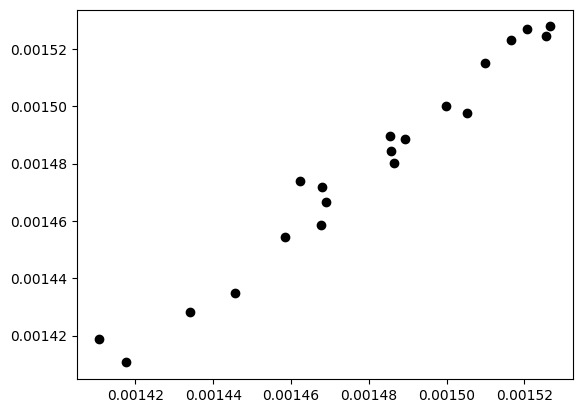

In [52]:
plt.scatter(p1, p2, color = "black")